In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tabulate import tabulate
import scipy.io
import warnings
warnings.filterwarnings("ignore")

# Task 1: Poisson neuron

# Task 2: Encoding: GLM, optimal kernel and STA

## Section A

In [2]:
sta = scipy.io.loadmat("GLM/STA.mat")
spikeTrain = sta["spikeTrain"].flatten()
stimSig = sta["stimSig"].flatten()

In [27]:
freq = 2000
period = 1 / freq

n = spikeTrain.shape[0]
time = n * period

intervals = np.arange(0, time, period)

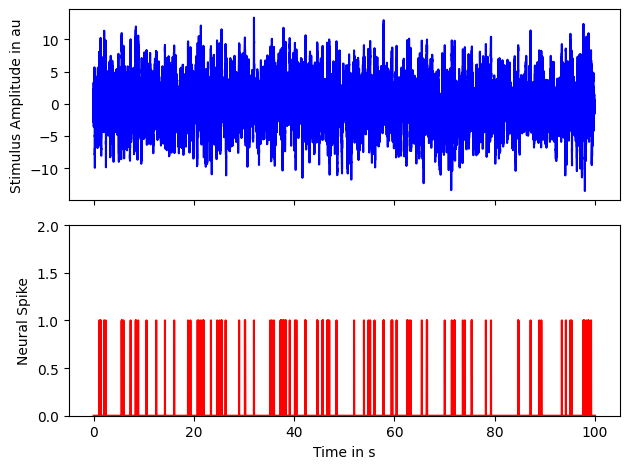

In [28]:
fig, axis = plt.subplots(2, sharex=True)

axis[0].plot(intervals, stimSig, c="b")
axis[1].plot(intervals, spikeTrain, c="r")

axis[1].set_ylim(0, 2)
axis[1].set_xlabel("Time in s")
axis[0].set_ylabel("Stimulus Amplitude in au")
axis[1].set_ylabel("Neural Spike")

plt.tight_layout()

In [31]:
window

1000

In [36]:
window_size = 0.5
window = int(window_size * freq)
stimulus_list = []
indices = np.where(spikeTrain == 1)[0]

for idx in indices:

    stimulus = stimSig[idx - window:idx + window + 1]
    stimulus_list.append(stimulus)

stimulus_arr = np.concatenate(stimulus_list).reshape(len(stimulus_list), 2 * window + 1)
sta_means = np.mean(stimulus_arr, axis=0)
sta_stds = np.std(stimulus_arr, axis=0)

Text(0, 0.5, 'Stimulus Amplitude in au')

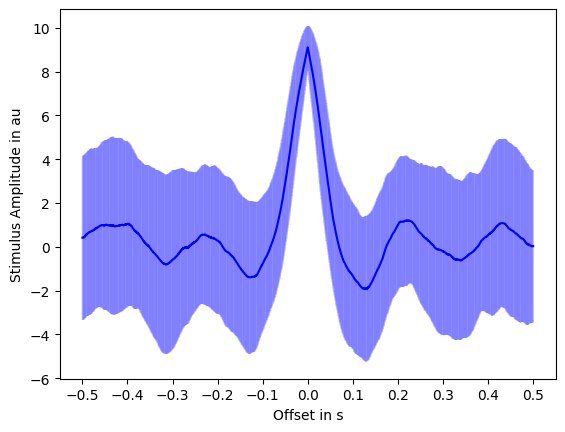

In [43]:
window_range = np.arange(-window_size, window_size + period, period)
xticks_range = np.arange(-window_size, window_size + 0.1, 0.1)

plt.errorbar(window_range, sta_means, yerr=sta_stds, elinewidth=0.1, c="b")

plt.xticks(xticks_range)
plt.xlabel("Offset in s")
plt.ylabel("Stimulus Amplitude in au")

Optimal frequency is around 500 s

In [20]:
np.sin(2 * np.pi * )

0.49975012493753124

## Section B

In [3]:
kernel = scipy.io.loadmat("GLM/kernel.mat")
stim = kernel["stim"]
resp = kernel["resp"]

# Task 3: PSTH and ROC

In [ ]:
# Set figure dimensions
plt.rcParams["figure.figsize"] = [10, 4]

In [3]:
sound_times = pd.read_csv("PSTH/sound_times.csv", header=None).to_numpy()
lick_times = pd.read_csv("PSTH/lick_times.csv", header=None).to_numpy()
spike_trains = pd.read_csv("PSTH/spike_trains.csv", header=None).to_numpy()

In [13]:
def process_spike_trains(spike_trains, event_times, trial_window):

    trial_list = []
    event_idx = np.round(event_times * 1e3).astype(int)

    for i in range(spike_trains.shape[1]):
        
        if i in event_idx:

            trial = spike_trains[:, i + trial_window[0]:i + trial_window[1]]
            trial_list.append(trial)

    spike_arr = np.hstack(trial_list).reshape(4, len(trial_list), -1)
    psth_vals = 1000 * np.mean(spike_arr, axis=1)

    return spike_arr, psth_vals

def plot_raster(arr, trial_window, ax):

    spike_list = [np.where(arr[i, :])[0] for i in range(arr.shape[0])]

    ax.eventplot(spike_list, colors="k")
    ax.axvline(x=-trial_window[0], color="r", linestyle="--")

    ax.set_ylabel("Trial")

def plot_psth(psth_vals, trial_window, ax):
    
    trial_range = np.arange(trial_window[0], trial_window[1], 100) / 1000
    time_range = np.arange(0, trial_window[1] - trial_window[0])
    xticks_range = np.arange(0, trial_window[1] - trial_window[0], 100)

    ax.bar(time_range, psth_vals, color="k")
    ax.axvline(x=-trial_window[0], color="r", linestyle="--")

    ax.set_xticks(ticks=xticks_range, labels=trial_range)
    ax.set_xlabel("Offset in s")
    ax.set_ylabel("Firing Rate in spikes/s")

In [14]:
trial_window = [-200, 1001]

spike_arr, psth_vals = process_spike_trains(spike_trains, sound_times, trial_window)

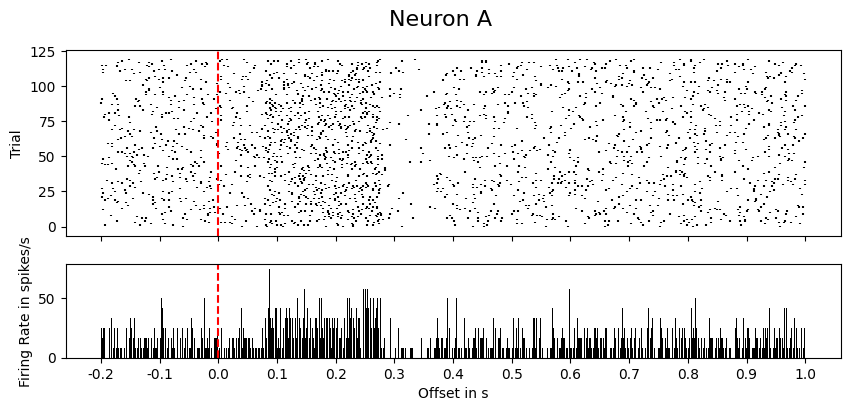

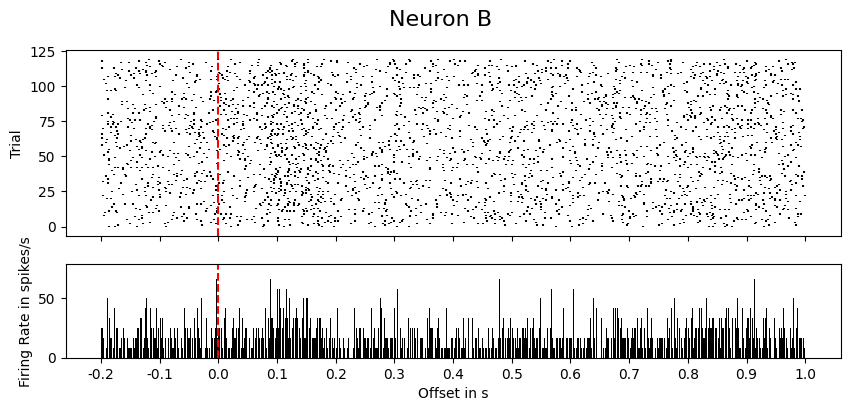

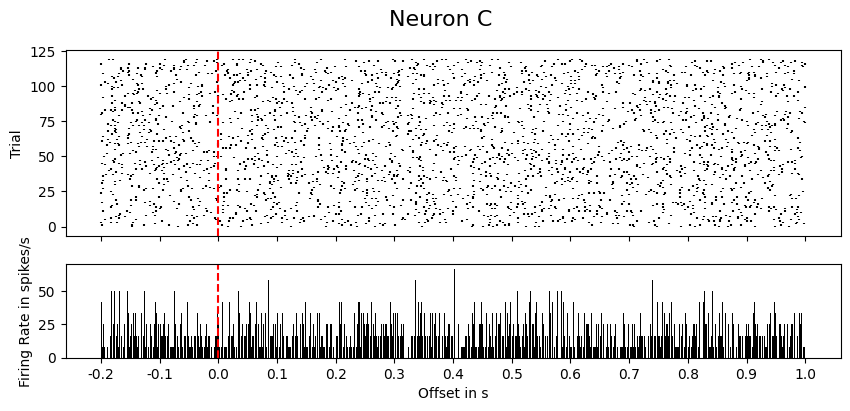

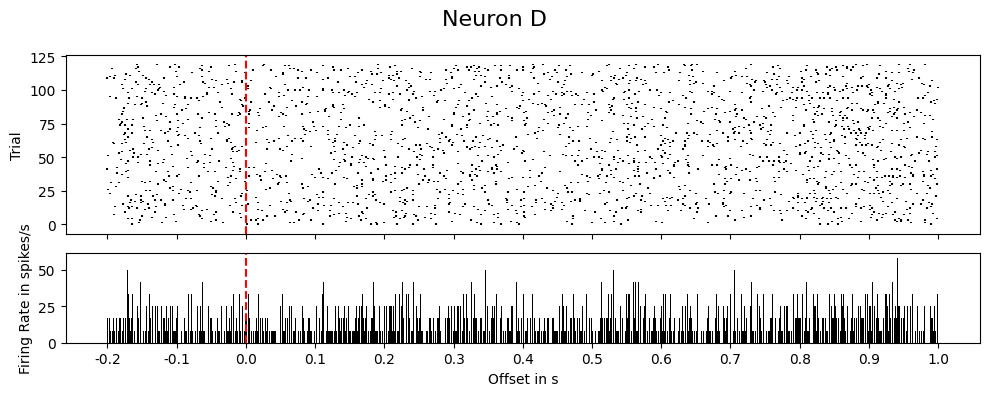

In [23]:
for i in range(spike_trains.shape[0]):

    fig, axes = plt.subplots(2, sharex=True, height_ratios=[2, 1])

    plot_raster(spike_arr[i], trial_window, axes[0])
    plot_psth(psth_vals[i], trial_window, axes[1])

    fig.suptitle(f"Neuron {'ABCD'[i]}", fontsize=16)

plt.tight_layout()

## Section B

## Section C

In [25]:
trial_window = [-500, 501]

spike_arr, psth_vals = process_spike_trains(spike_trains, lick_times, trial_window)

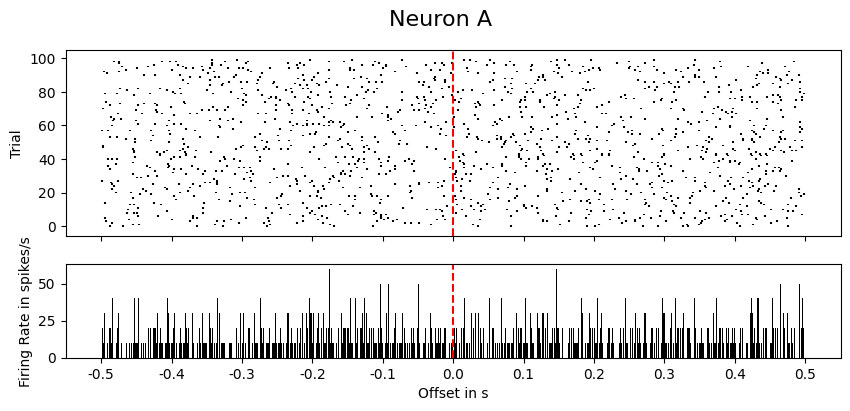

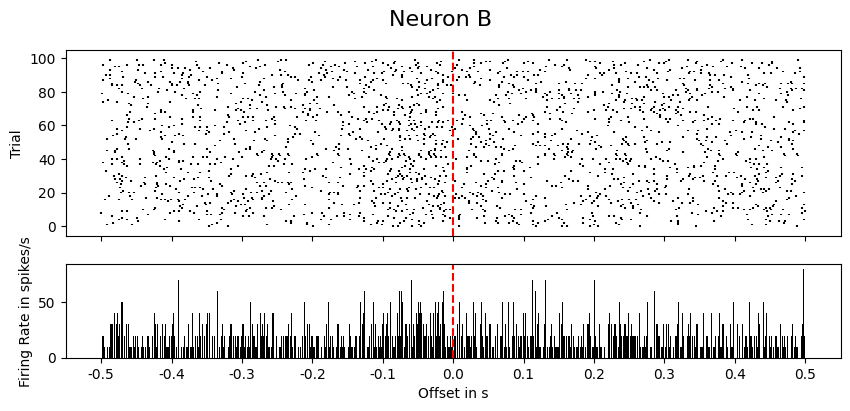

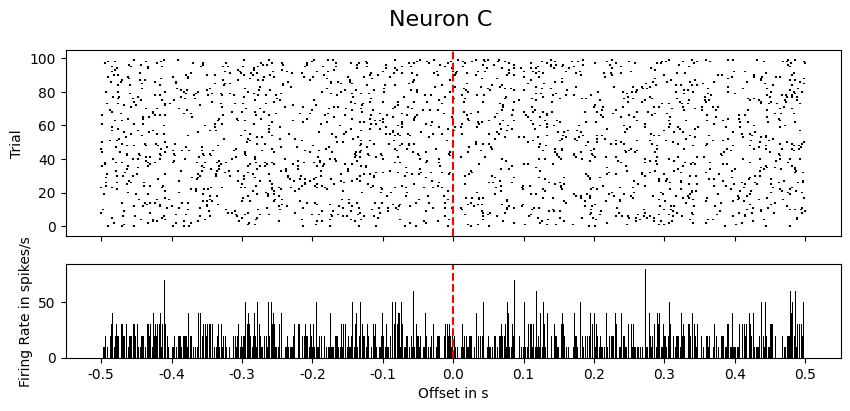

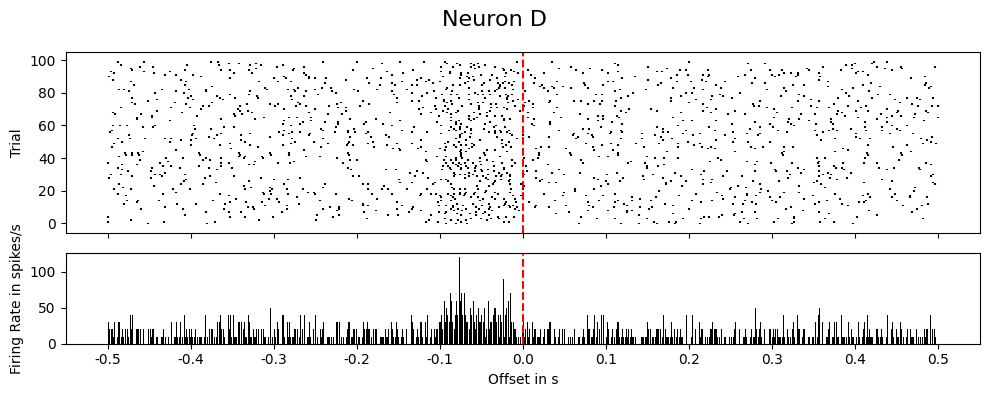

In [28]:
for i in range(spike_trains.shape[0]):

    fig, axes = plt.subplots(2, sharex=True, height_ratios=[2, 1])

    plot_raster(spike_arr[i], trial_window, axes[0])
    plot_psth(psth_vals[i], trial_window, axes[1])

    fig.suptitle(f"Neuron {'ABCD'[i]}", fontsize=16)

plt.tight_layout()

## Section D

In [2]:
lick_df = pd.read_csv("PSTH/fr_pre_licks.csv")

In [27]:
lick_df["pred"] = lick_df["fr_100ms_pre"] >= 20
lick_df["pred"] = lick_df["pred"].astype(int)
lick_df["divergence"] = lick_df["lick"] - lick_df["pred"]

In [25]:
def find_accuracy(group):

    accuracy = 1 - np.abs(group["divergence"]).sum() / group["lick"].count()
    return 100 * accuracy

In [26]:
gr_lick_df = lick_df.groupby("neuron")
acc = gr_lick_df.apply(find_accuracy)
acc

neuron
A    50.0
B    60.0
C    48.0
D    95.0
dtype: float64

In [45]:
def find_fpr(group):

    false_positives = np.sum(np.where((group["lick"] == 0) & (group["pred"] == 1), 1, 0))
    true_negatives = np.sum(np.where((group["lick"] == 0) & (group["pred"] == 0), 1, 0))

    false_positive_rate = false_positives / (false_positives + true_negatives)
    return 100 * false_positive_rate

In [46]:
fpr = gr_lick_df.apply(find_fpr)
fpr

neuron
A     2.0
B    80.0
C    18.0
D     0.0
dtype: float64

In [43]:
def find_tpr(group):

    true_positives = np.sum(np.where((group["lick"] == 1) & (group["pred"] == 1), 1, 0))
    false_negatives = np.sum(np.where((group["lick"] == 1) & (group["pred"] == 0), 1, 0))

    true_positive_rate = true_positives / (true_positives + false_negatives)
    return 100 * true_positive_rate

In [44]:
tpr = gr_lick_df.apply(find_tpr)
tpr

neuron
A      2.0
B    100.0
C     14.0
D     90.0
dtype: float64